In [19]:
# use GLCM from skimage.feature
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops
from skimage import data
from skimage import io
import os
# PCA from sklearn
from sklearn.decomposition import PCA
# train test split from sklearn
from sklearn.model_selection import train_test_split
# lazy predict
from lazypredict.Supervised import LazyClassifier
# brightness correction
from skimage import exposure
# HOG
from skimage.feature import hog, local_binary_pattern
# resize
from skimage.transform import resize


In [23]:
image = io.imread('flooded/1.jpg', as_gray=True)

# brightness correction
image_corr = exposure.equalize_adapthist(image, clip_limit=0.03)

# scale image to 400x300
image_corr = resize(image_corr, (400, 320), anti_aliasing=True)

# HOG
fd= hog(image_corr, orientations=8, pixels_per_cell=(50, 40),
                    cells_per_block=(1, 1), multichannel=False)

print(fd.shape)

# GLCM

(512,)
(400, 320)


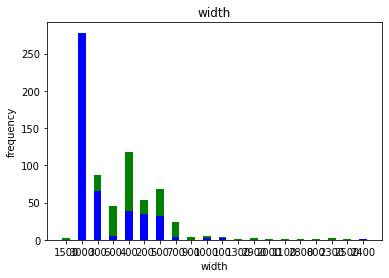

In [10]:
# loop for all images in flooded and non-flooded, store their width and aspect ratio as frequencies
width_flooded = {}
aspect_ratio_flooded = {}
for i in range(0, 461):
    image = io.imread('flooded/'+str(i)+'.jpg', as_gray=True)
    # calculate the features
    w, h = image.shape

    if str((w // 100) * 100) in width_flooded:
        width_flooded[str((w // 100) * 100)] += 1
    else:
        width_flooded[str((w // 100) * 100)] = 1
    
    if str((w / h) // 0.1 * 0.1) in aspect_ratio_flooded:
        aspect_ratio_flooded[str((w / h) // 0.1 * 0.1)] += 1
    else:
        aspect_ratio_flooded[str((w / h) // 0.1 * 0.1)] = 1

width_non_flooded = {}
aspect_ratio_non_flooded = {}
for i in range(578, 1039):
    image = io.imread('non-flooded/'+str(i)+'.jpg', as_gray=True)
    # calculate the features
    w, h = image.shape

    if str((w // 100) * 100) in width_non_flooded:
        width_non_flooded[str((w // 100) * 100)] += 1
    else:
        width_non_flooded[str((w // 100) * 100)] = 1
    
    if str((w / h) // 0.1 * 0.1) in aspect_ratio_non_flooded:
        aspect_ratio_non_flooded[str((w / h) // 0.1 * 0.1)] += 1
    else:
        aspect_ratio_non_flooded[str((w / h) // 0.1 * 0.1)] = 1


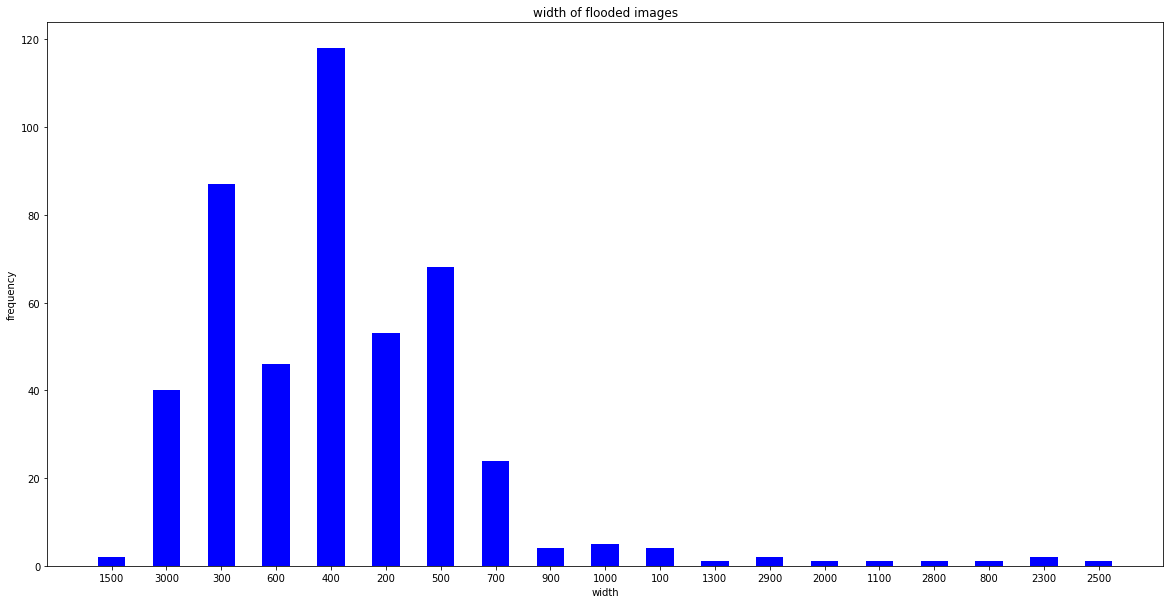

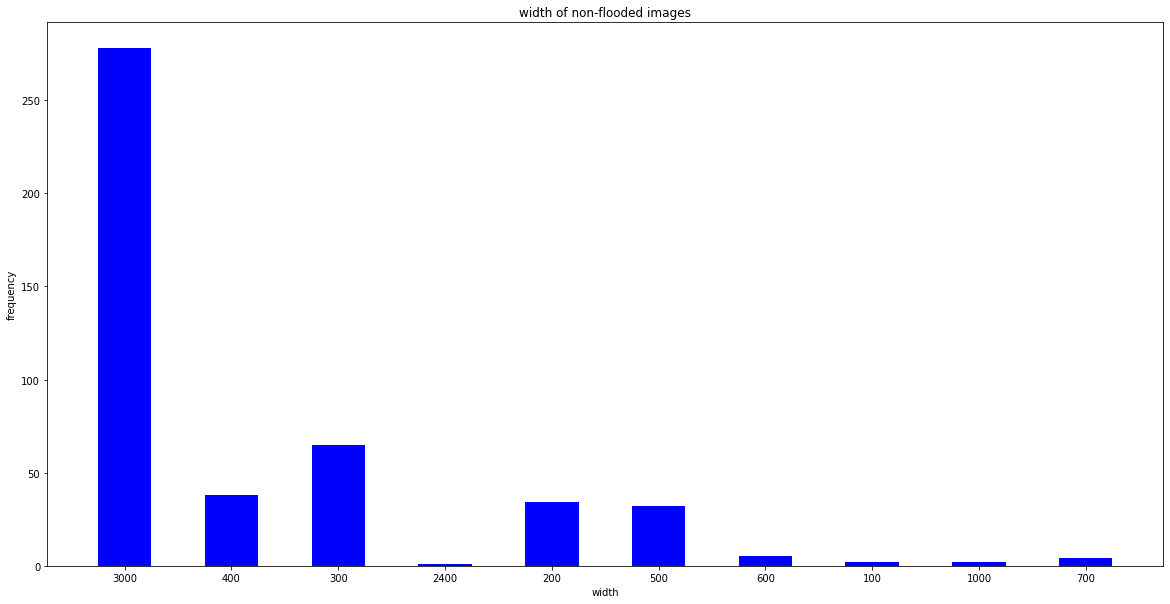

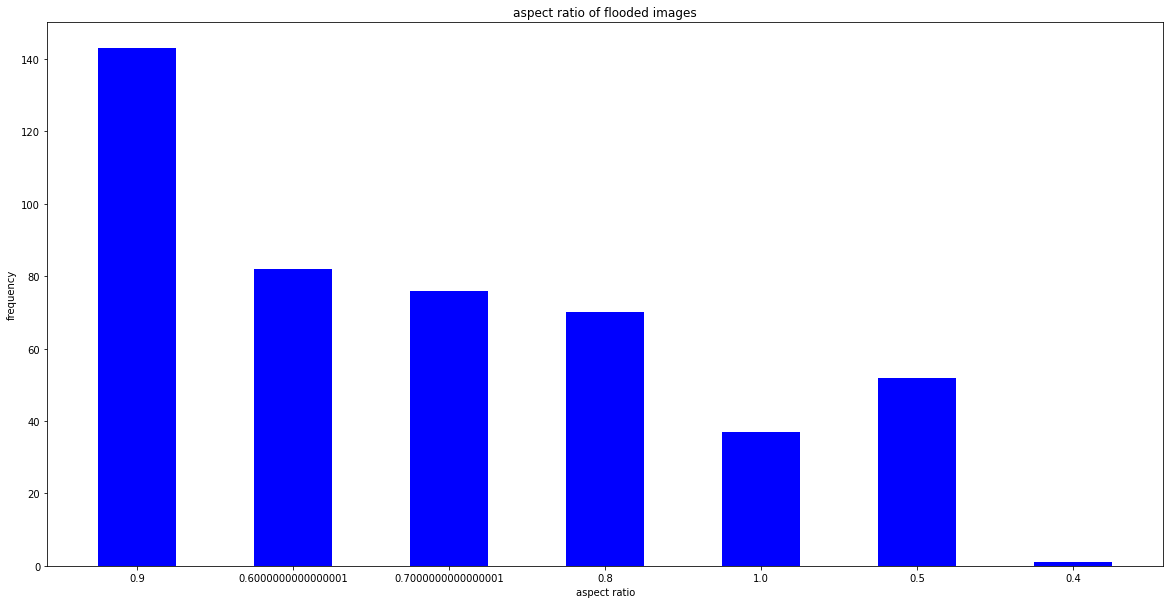

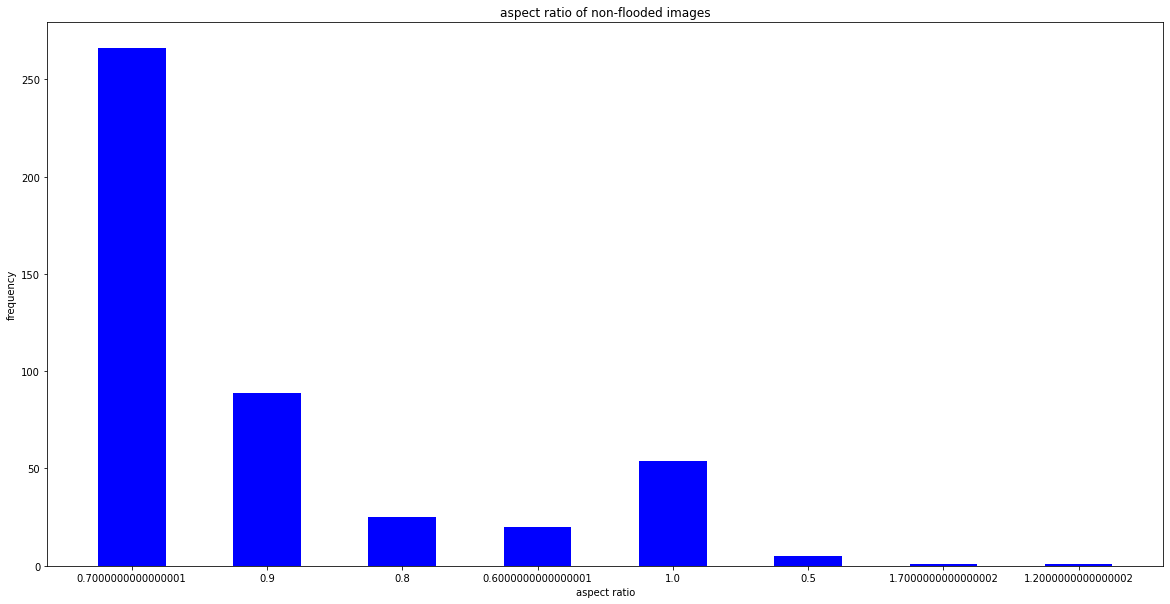

In [13]:
# plot the frequencies each on unique plot, make the plot bigger
plt.figure(figsize=(20, 10))
plt.bar(width_flooded.keys(), width_flooded.values(), width=0.5, color='b')
plt.xlabel('width')
plt.ylabel('frequency')
plt.title('width of flooded images')
plt.show()

plt.figure(figsize=(20, 10))
plt.bar(width_non_flooded.keys(), width_non_flooded.values(), width=0.5, color='b')
plt.xlabel('width')
plt.ylabel('frequency')
plt.title('width of non-flooded images')
plt.show()

plt.figure(figsize=(20, 10))
plt.bar(aspect_ratio_flooded.keys(), aspect_ratio_flooded.values(), width=0.5, color='b')
plt.xlabel('aspect ratio')
plt.ylabel('frequency')
plt.title('aspect ratio of flooded images')
plt.show()

plt.figure(figsize=(20, 10))
plt.bar(aspect_ratio_non_flooded.keys(), aspect_ratio_non_flooded.values(), width=0.5, color='b')
plt.xlabel('aspect ratio')
plt.ylabel('frequency')
plt.title('aspect ratio of non-flooded images')
plt.show()